In [ ]:
import numpy as np

# Generate example time series data
t = np.linspace(0, 10*np.pi, 1000)
x = np.sin(t)

In [20]:
import numpy as np

def calculate_y(x):
    y = 1E-23 * x ** 6 - 1E-18 * x ** 5 + 4E-14 * x ** 4 - 6E-10 * x ** 3 + 5E-06 * x ** 2 - 0.0138 * x + 68.886
    return y

y_values = np.zeros(10000)

for i in range(1, 10001):
    n = calculate_y(i)
    y_values[i-1] = n
    print(n)

x = y_values   

68.87220499940004
68.85841999520063
68.84464498380324
68.83087996161024
68.817124925025
68.80337987045183
68.78964479429602
68.7759196929638
68.76220456286238
68.7484994003999
68.73480420198547
68.72111896402919
68.70744368294207
68.6937783551361
68.68012297702424
68.66647754502038
68.65284205553941
68.63921650499715
68.62560088981036
68.6119952063968
68.59839945117515
68.58481362056509
68.5712377109872
68.55767171886308
68.54411564061523
68.53056947266715
68.51703321144329
68.50350685336903
68.48999039487073
68.4764838323757
68.46298716231222
68.44950038110949
68.43602348519771
68.42255647100802
68.4090993349725
68.39565207352419
68.38221468309712
68.36878716012623
68.35536950104745
68.34196170229764
68.32856376031462
68.3151756715372
68.3017974324051
68.28842903935899
68.27507048884056
68.26172177729237
68.248382901158
68.23505385688195
68.2217346409097
68.20842524968765
68.19512567966319
68.18183592728462
68.16855598900126
68.15528586126332
68.14202554052198
68.12877502322941
68.115

C:\Users\marvi\AppData\Local\Temp/ipykernel_31712/3228552728.py:40: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


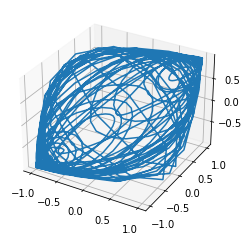

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

data = np.loadtxt("OEE_over_time2.txt")

x = data[:, :3]

# Interpolate
time = [x[0] for x in data]
values = [x[2] for x in data]

# Define a new set of time points for interpolation
new_time = np.linspace(min(time), max(time), num=1000, endpoint=True)

# Create a non-linear interpolation function using a cubic spline
interp_func = interp1d(time, values, kind='quadratic')

# Use the interpolation function to estimate new values
new_values = interp_func(new_time)

# Combine the new time and values into a list
new_time_series = list(zip(new_time, new_values))

x = new_values

x = np.sin(x)

# Define embedding parameters
embedding_dim = 3   # Embedding dimension
embedding_delay = 2   # Time delay

# Create embedding matrix
embeddings = np.empty((len(x)-(embedding_dim-1)*embedding_delay, embedding_dim))
for i in range(embedding_dim):
    embeddings[:, i] = x[i*embedding_delay:i*embedding_delay+len(embeddings)]

# Plot the reconstructed attractor
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2])
plt.show()



